# Begining

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [23]:
predictor="4_features"

In [30]:
dir = '/content/drive/MyDrive/BI-druggable-protein-prediction/Data/'
processed_data_dir = 'selected_data'
AAC = pd.read_csv(f'{dir+processed_data_dir}/preprocessed_AAC.csv')
PAAC = pd.read_csv(f'{dir+processed_data_dir}/preprocessed_PAAC.csv')
APAAC = pd.read_csv(f'{dir+processed_data_dir}/preprocessed_APAAC.csv')
CTD = pd.read_csv(f'{dir+processed_data_dir}/preprocessed_CTD.csv')

In [31]:
processed_data_dir = 'processed_data'
AAC_test = pd.read_csv(f'{dir+processed_data_dir}/TS_AAC.csv')
PAAC_test = pd.read_csv(f'{dir+processed_data_dir}/TS_PAAC.csv')
APAAC_test = pd.read_csv(f'{dir+processed_data_dir}/TS_APAAC.csv')
CTD_test = pd.read_csv(f'{dir+processed_data_dir}/TS_CTD.csv')

In [32]:
feature_set=[AAC,PAAC,APAAC,CTD]
feature_set_test=[AAC_test,PAAC_test,APACC_test,CTD_test]

In [ ]:
for feature in feature_set:
  print('shape: ',feature.shape,'\n')

shape:  (2542, 16) 

shape:  (2529, 23) 

shape:  (2529, 30) 

shape:  (2542, 104) 



In [ ]:
for feature in feature_set:
  print('feature-------------------------\n',feature.head(),'\n')

feature-------------------------
               id  label      C      P      I      K      D      Y      F  \
0    Positive_17      1  4.639  4.639  7.990  3.093  3.866  3.866  5.670   
1   Positive_939      1  1.279  4.158  5.650  5.757  4.371  2.772  4.371   
2   Negative_794      0  3.736  5.172  4.598  5.747  4.310  2.874  3.448   
3  Negative_1238      0  4.000  3.385  2.462  4.923  4.923  5.231  6.462   
4   Negative_731      0  3.000  9.000  2.000  4.000  4.000  5.000  3.000   

       S      N      E      V      Q      R       L  
0  6.701  3.866  3.093  8.247  3.866  4.639  10.825  
1  7.783  4.691  6.290  7.143  3.625  6.503   8.742  
2  5.172  4.023  6.609  4.023  5.747  6.897  11.207  
3  8.308  5.231  4.000  4.923  3.385  5.846   6.154  
4  5.000  1.000  8.000  6.000  4.000  8.000  12.000   

feature-------------------------
               id  label  PAAC5  PAAC15  PAAC10  PAAC4  PAAC12  PAAC19  PAAC3  \
0   Positive_588      1  0.191   1.147   2.295  1.530   3.824   2.295

In [ ]:
for feature in feature_set:
  print('feature-------------------------\n',feature.describe(),'\n\n')

feature-------------------------
              label            C            P            I            K  \
count  2542.000000  2542.000000  2542.000000  2542.000000  2542.000000   
mean      0.481117     2.636966     6.395675     4.504955     5.031131   
std       0.499742     2.401327     3.401415     2.171388     2.598514   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.364000     4.469000     2.985000     3.270500   
50%       0.000000     2.144500     5.736000     4.504000     4.839000   
75%       1.000000     3.149500     7.627000     5.910500     6.520250   
max       1.000000    32.258000    42.623000    16.667000    22.034000   

                 D            Y            F            S            N  \
count  2542.000000  2542.000000  2542.000000  2542.000000  2542.000000   
mean      4.449721     2.975199     3.963205     7.506538     3.458389   
std       1.863144     2.078501     1.823507     2.656739     1.776950   
min

In [ ]:
for feature in feature_set:
  print(feature.info(),'\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      2542 non-null   object 
 1   label   2542 non-null   int64  
 2   C       2542 non-null   float64
 3   P       2542 non-null   float64
 4   I       2542 non-null   float64
 5   K       2542 non-null   float64
 6   D       2542 non-null   float64
 7   Y       2542 non-null   float64
 8   F       2542 non-null   float64
 9   S       2542 non-null   float64
 10  N       2542 non-null   float64
 11  E       2542 non-null   float64
 12  V       2542 non-null   float64
 13  Q       2542 non-null   float64
 14  R       2542 non-null   float64
 15  L       2542 non-null   float64
dtypes: float64(14), int64(1), object(1)
memory usage: 317.9+ KB
None 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2529 entries, 0 to 2528
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  -----

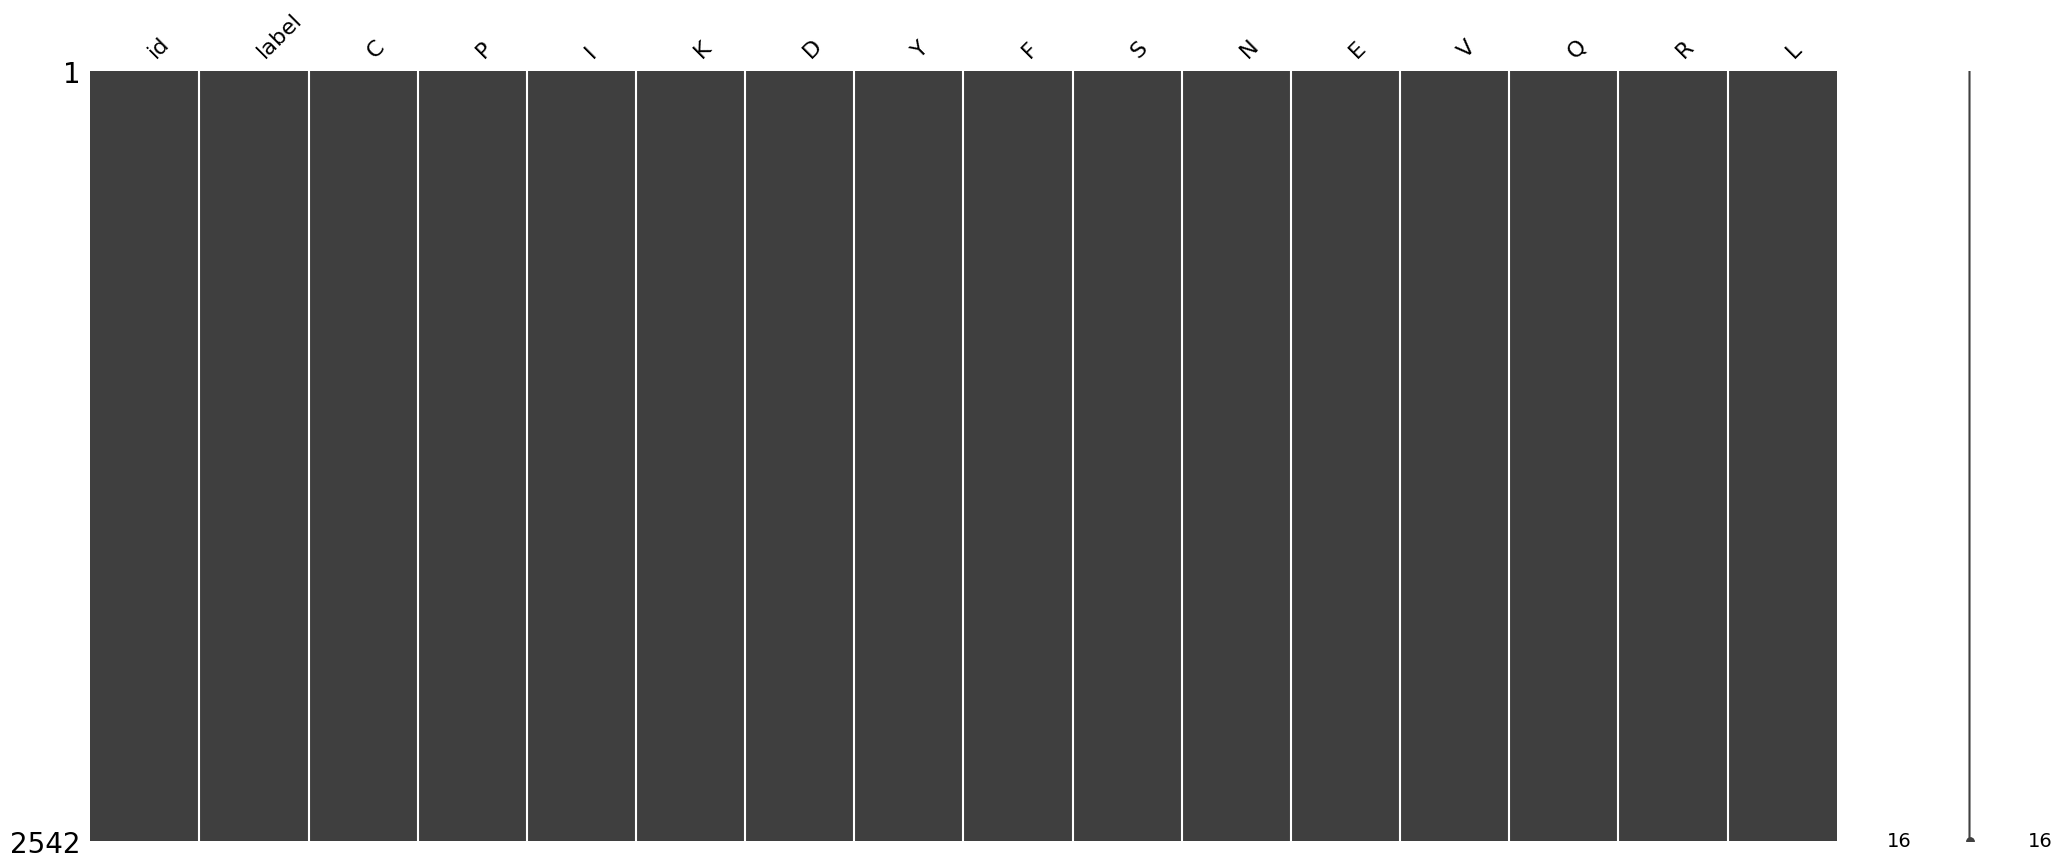

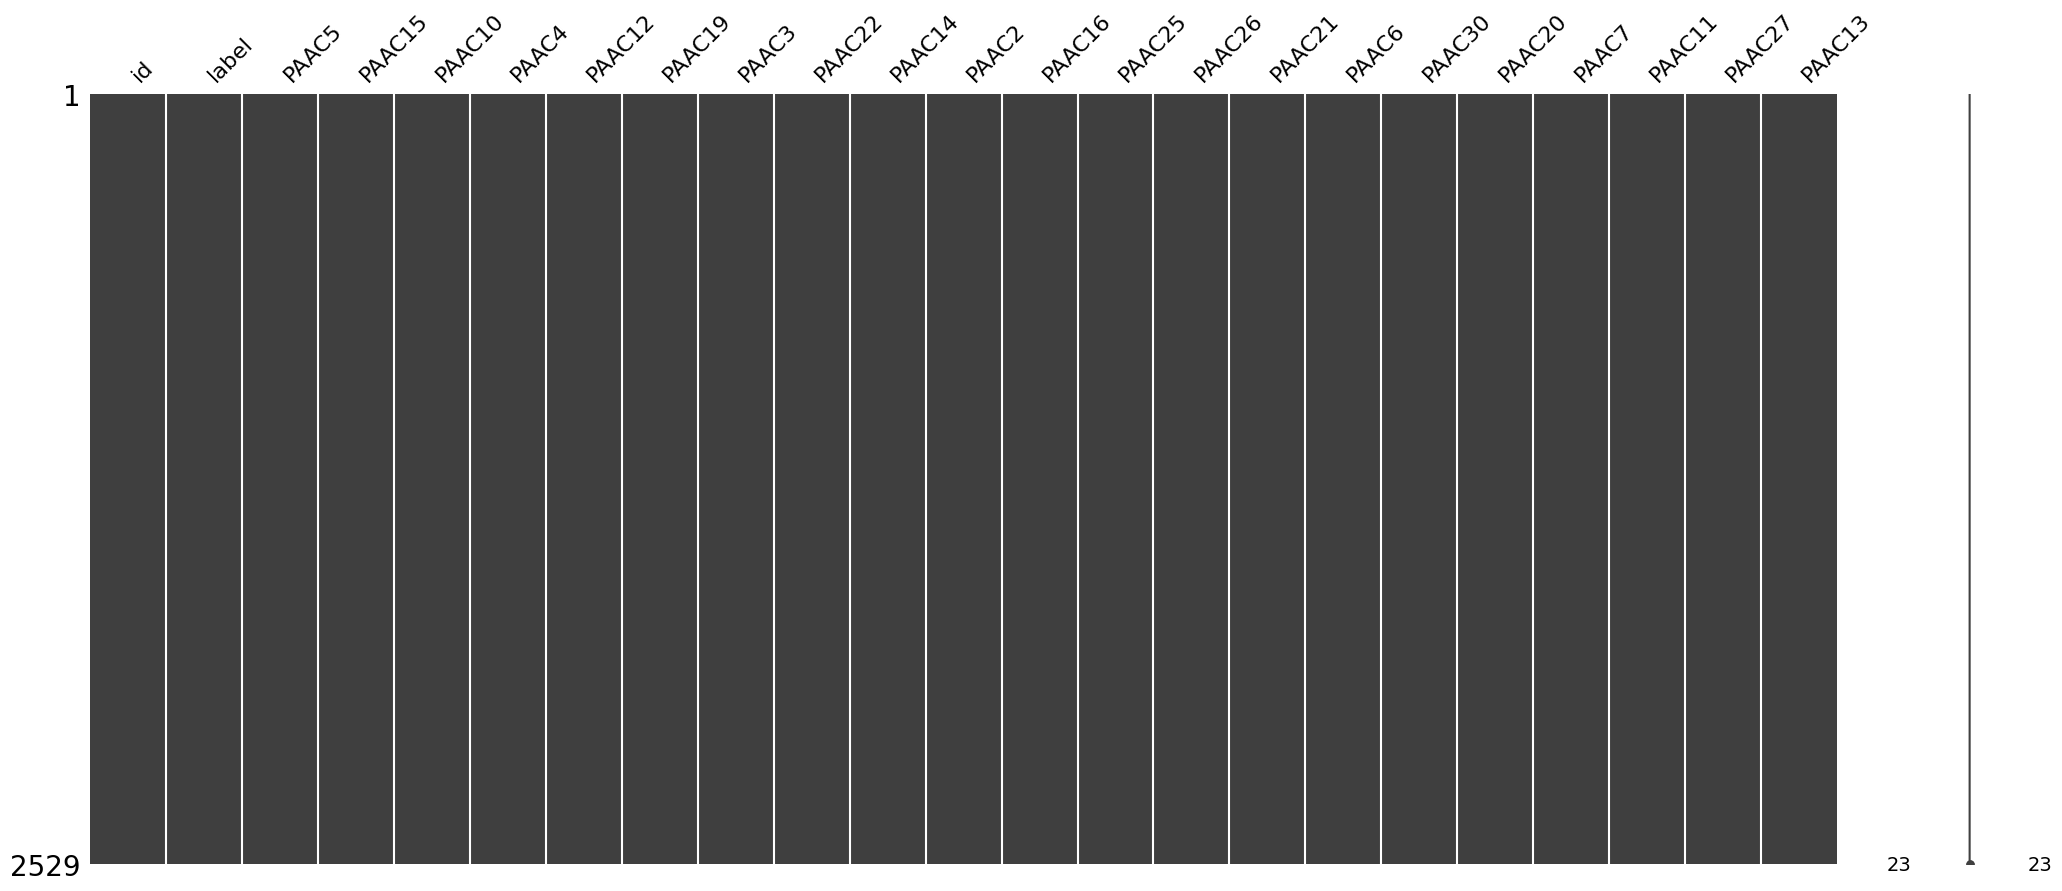

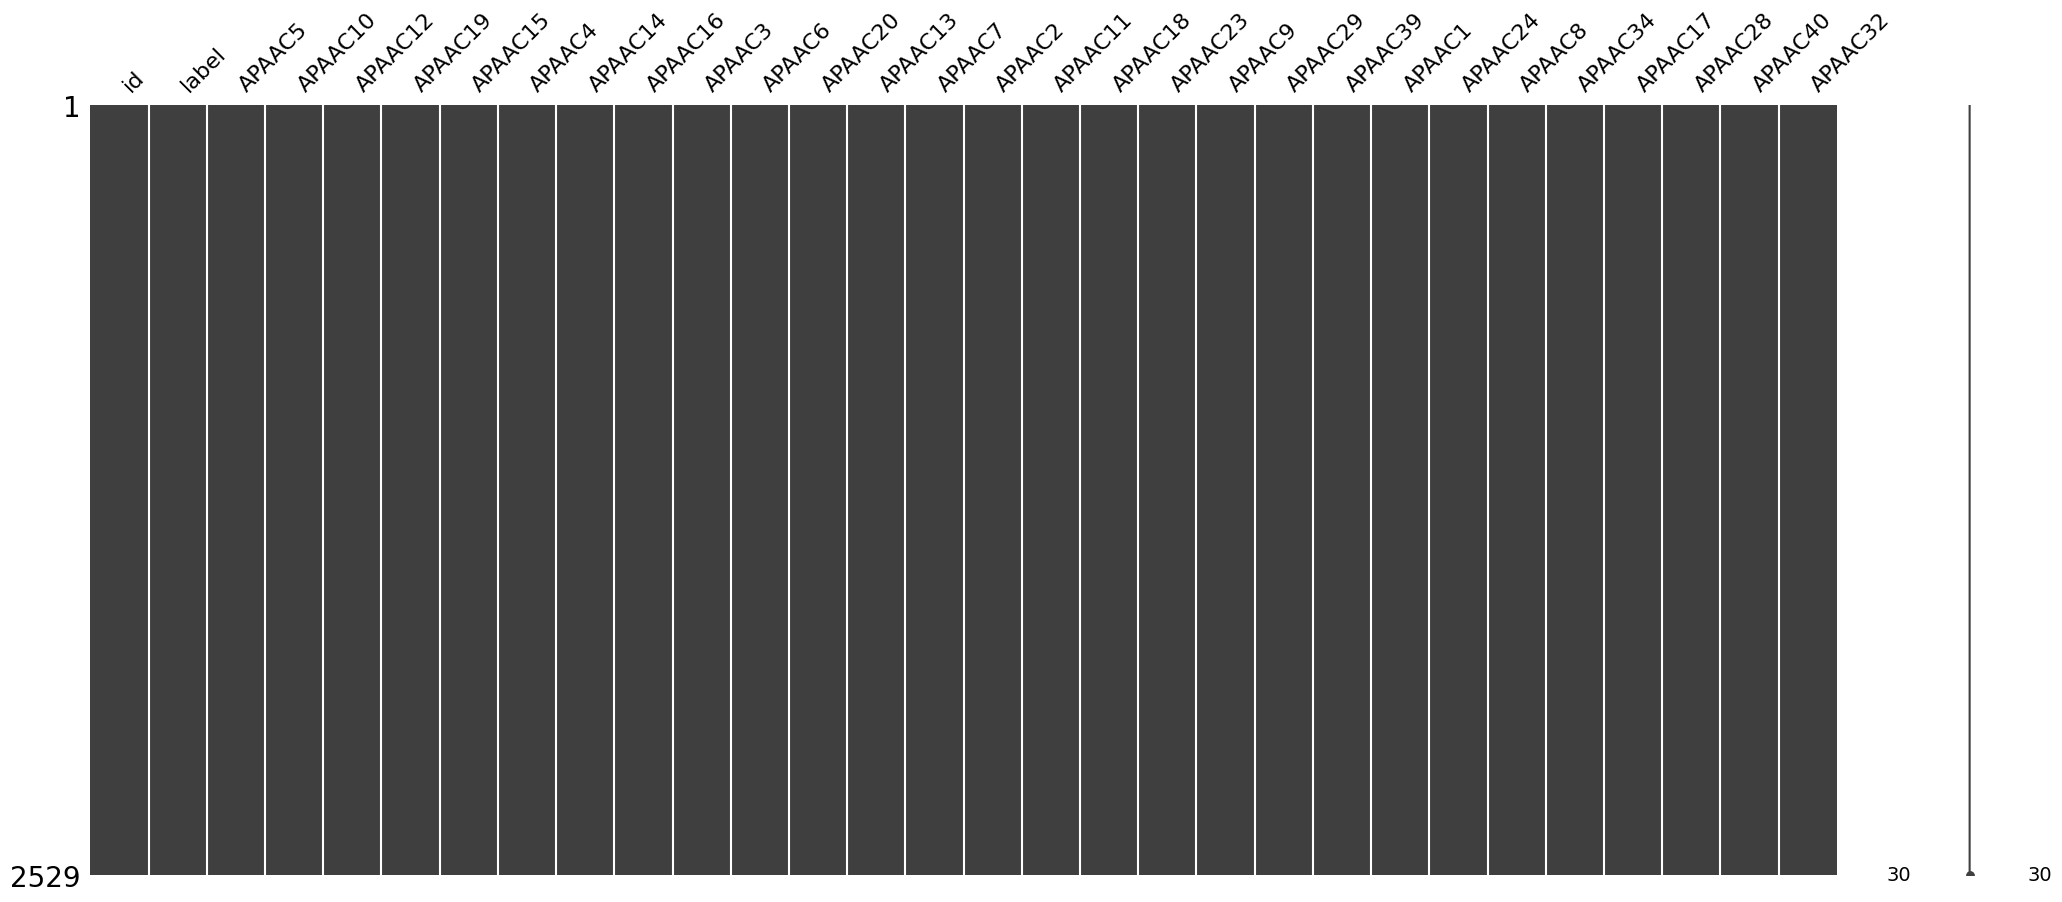

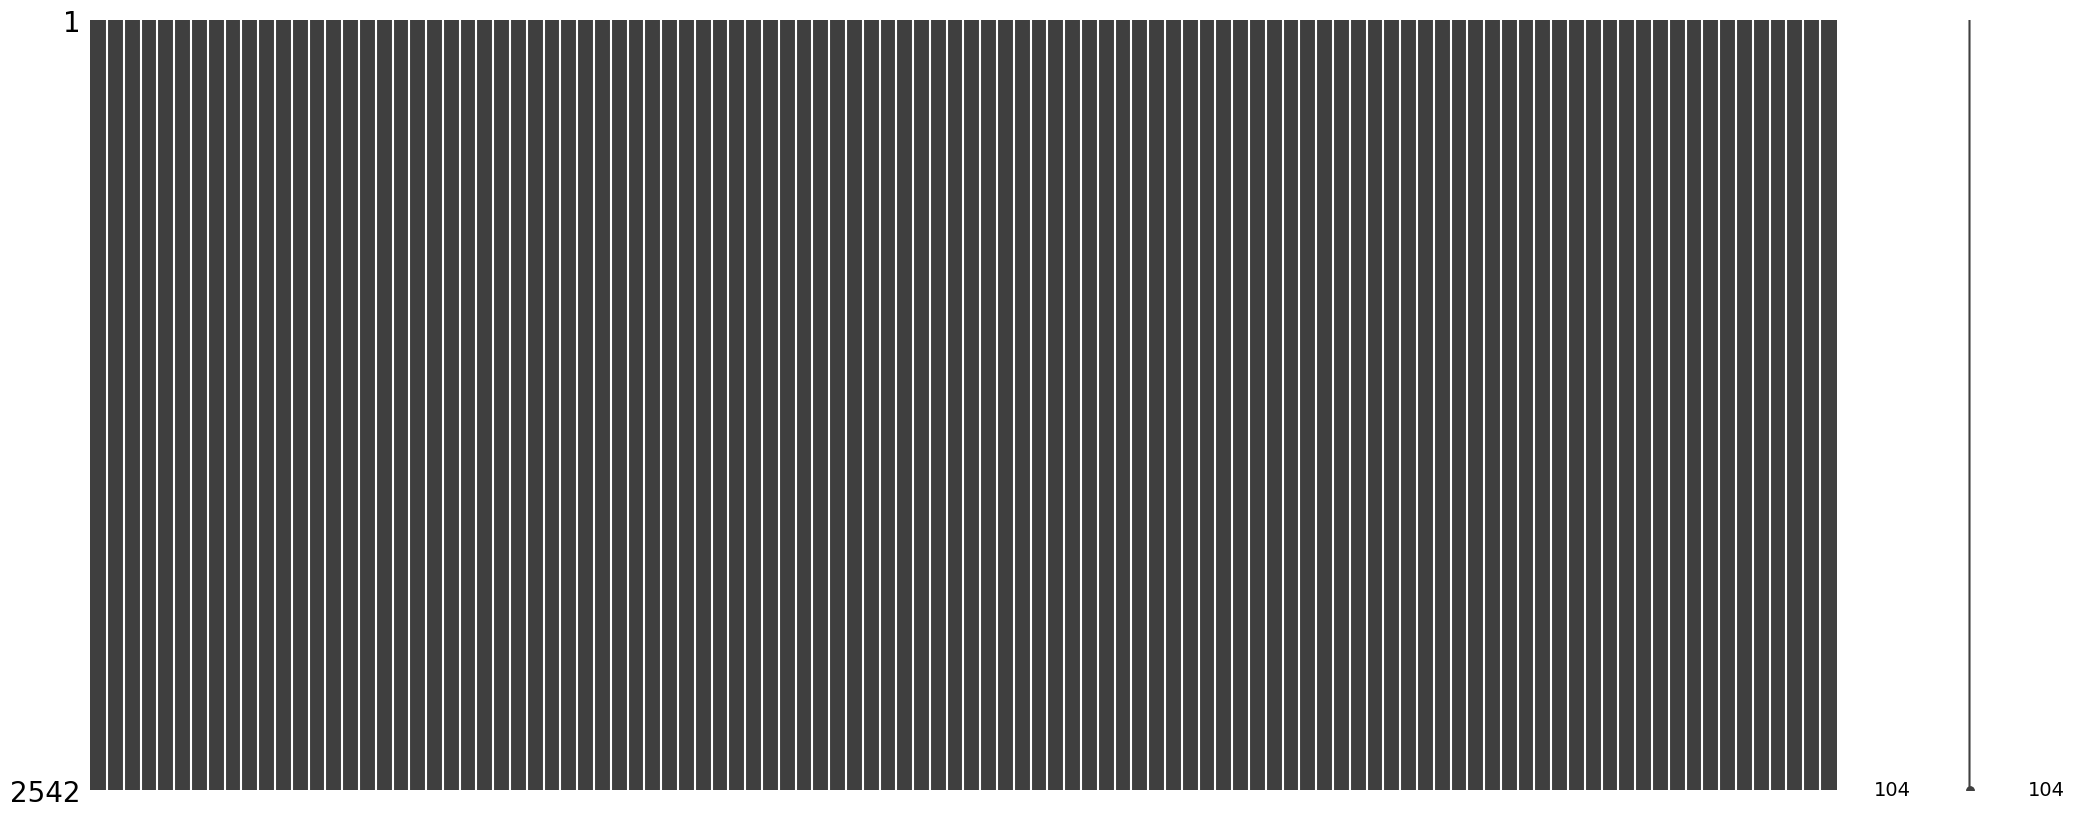

In [ ]:
for feature in feature_set:
  msno.matrix(feature)

##merge 4 features in to 1


In [7]:
merged_df = feature_set[0]
for feature in feature_set[1:]:
  merged_df = pd.merge(merged_df, feature, on=('id','label'))

In [10]:
merged_df.shape

(2529, 167)

In [12]:
  merged_df_test.shape

(450, 173)

In [13]:
merged_df_test.head()

,A,R,N,D,C,E,Q,G,H,I,...,_NormalizedVDWVD2050,_SecondaryStrD1050,_PolarityD3075,_PolarityD2025,_PolarizabilityD2050,_HydrophobicityT23,_NormalizedVDWVD3075,_HydrophobicityD3075,_PolarizabilityD2025,_HydrophobicityD3050
0,16.309,10.300,0.429,5.150,2.146,7.296,5.150,10.730,0.429,1.288,...,55.814,55.814,90.116,9.884,48.837,0.333,61.047,65.698,30.814,45.349
1,11.283,7.419,3.400,6.028,0.309,3.400,4.791,10.355,1.546,4.173,...,51.111,52.667,78.444,28.667,53.778,0.303,76.889,72.222,23.778,53.333
2,7.831,2.410,1.807,7.229,2.410,9.036,1.205,5.422,0.602,5.422,...,50.173,58.131,73.010,21.799,50.173,0.264,67.128,76.817,25.606,45.675
3,13.987,7.516,2.505,7.933,0.418,4.593,2.505,8.977,3.758,2.296,...,43.700,45.308,73.727,30.831,43.700,0.280,82.038,76.139,22.788,46.649
4,5.055,6.148,5.464,6.421,1.230,6.557,3.689,6.831,1.913,5.191,...,45.161,46.898,73.201,27.543,47.643,0.294,79.156,74.442,27.047,48.387


In [ ]:
merged_df.describe()

,label,C,P,I,K,D,Y,F,S,N,...,_NormalizedVDWVD2050,_SecondaryStrD1050,_PolarityD3075,_PolarityD2025,_PolarizabilityD2050,_HydrophobicityT23,_NormalizedVDWVD3075,_HydrophobicityD3075,_PolarizabilityD2025,_HydrophobicityD3050
count,2529.000000,2529.000000,2529.000000,2529.000000,2529.000000,2529.000000,2529.000000,2529.000000,2529.000000,2529.000000,...,2529.000000,2529.000000,2529.000000,2529.000000,2529.000000,2529.000000,2529.000000,2529.000000,2529.000000,2529.000000
mean,0.483590,2.641624,6.379188,4.514822,5.048646,4.435971,2.977641,3.974241,7.518104,3.439544,...,49.314599,49.107920,74.648473,23.638528,49.599225,0.246894,73.903294,73.113881,24.765614,48.795895
std,0.499829,2.388686,3.359709,2.145764,2.579179,1.784815,2.057287,1.795765,2.626936,1.684549,...,5.933726,4.713166,5.847655,4.839645,4.093003,0.049626,6.131155,5.690838,3.432916,6.183529
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.819000,9.091000,9.091000,6.452000,23.529000,0.000000,5.263000,0.000000,8.333000,0.000000
25%,0.000000,1.370000,4.472000,2.999000,3.297000,3.279000,1.875000,2.817000,5.823000,2.321000,...,46.727000,46.582000,72.152000,20.568000,47.436000,0.217000,70.833000,71.084000,22.912000,46.085000
50%,0.000000,2.148000,5.728000,4.515000,4.850000,4.510000,2.862000,3.842000,7.182000,3.390000,...,49.559000,49.476000,75.000000,23.647000,49.787000,0.244000,74.503000,73.958000,24.740000,49.091000
75%,1.000000,3.153000,7.602000,5.911000,6.522000,5.528000,3.765000,4.984000,8.761000,4.402000,...,52.381000,51.948000,77.830000,26.545000,51.828000,0.274000,77.586000,76.301000,26.649000,52.030000
max,1.000000,32.258000,42.623000,16.667000,22.034000,14.286000,32.143000,15.263000,30.769000,13.043000,...,75.000000,75.000000,95.833000,52.381000,67.273000,0.520000,100.000000,90.909000,42.647000,81.818000


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2529 entries, 0 to 2528
Columns: 167 entries, id to _HydrophobicityD3050
dtypes: float64(165), int64(1), object(1)
memory usage: 3.2+ MB


In [95]:
merged_df_test.columns.tolist()

['id',
 'label',
 'C',
 'P',
 'I',
 'K',
 'D',
 'Y',
 'F',
 'S',
 'N',
 'E',
 'V',
 'Q',
 'R',
 'L',
 'PAAC5',
 'PAAC15',
 'PAAC10',
 'PAAC4',
 'PAAC12',
 'PAAC19',
 'PAAC3',
 'PAAC22',
 'PAAC14',
 'PAAC2',
 'PAAC16',
 'PAAC25',
 'PAAC26',
 'PAAC21',
 'PAAC6',
 'PAAC30',
 'PAAC20',
 'PAAC7',
 'PAAC11',
 'PAAC27',
 'PAAC13',
 'APAAC1',
 'APAAC2',
 'APAAC3',
 'APAAC4',
 'APAAC5',
 'APAAC6',
 'APAAC7',
 'APAAC8',
 'APAAC9',
 'APAAC10',
 'APAAC11',
 'APAAC12',
 'APAAC13',
 'APAAC14',
 'APAAC15',
 'APAAC16',
 'APAAC17',
 'APAAC18',
 'APAAC19',
 'APAAC20',
 'APAAC21',
 'APAAC22',
 'APAAC23',
 'APAAC24',
 'APAAC25',
 'APAAC26',
 'APAAC27',
 'APAAC28',
 'APAAC29',
 'APAAC30',
 'APAAC31',
 'APAAC32',
 'APAAC33',
 'APAAC34',
 'APAAC35',
 'APAAC36',
 'APAAC37',
 'APAAC38',
 'APAAC39',
 'APAAC40',
 '_NormalizedVDWVC1',
 '_PolarityC2',
 '_NormalizedVDWVT23',
 '_HydrophobicityC2',
 '_NormalizedVDWVC3',
 '_ChargeC3',
 '_ChargeD2001',
 '_SolventAccessibilityD3001',
 '_HydrophobicityD3001',
 '_Polarity

In [ ]:
# merged_df.to_csv(f'/content/drive/MyDrive/BI-druggable-protein-prediction/Data/selected_data/preprocessed_{predictor}.csv', index=False)

<Axes: >

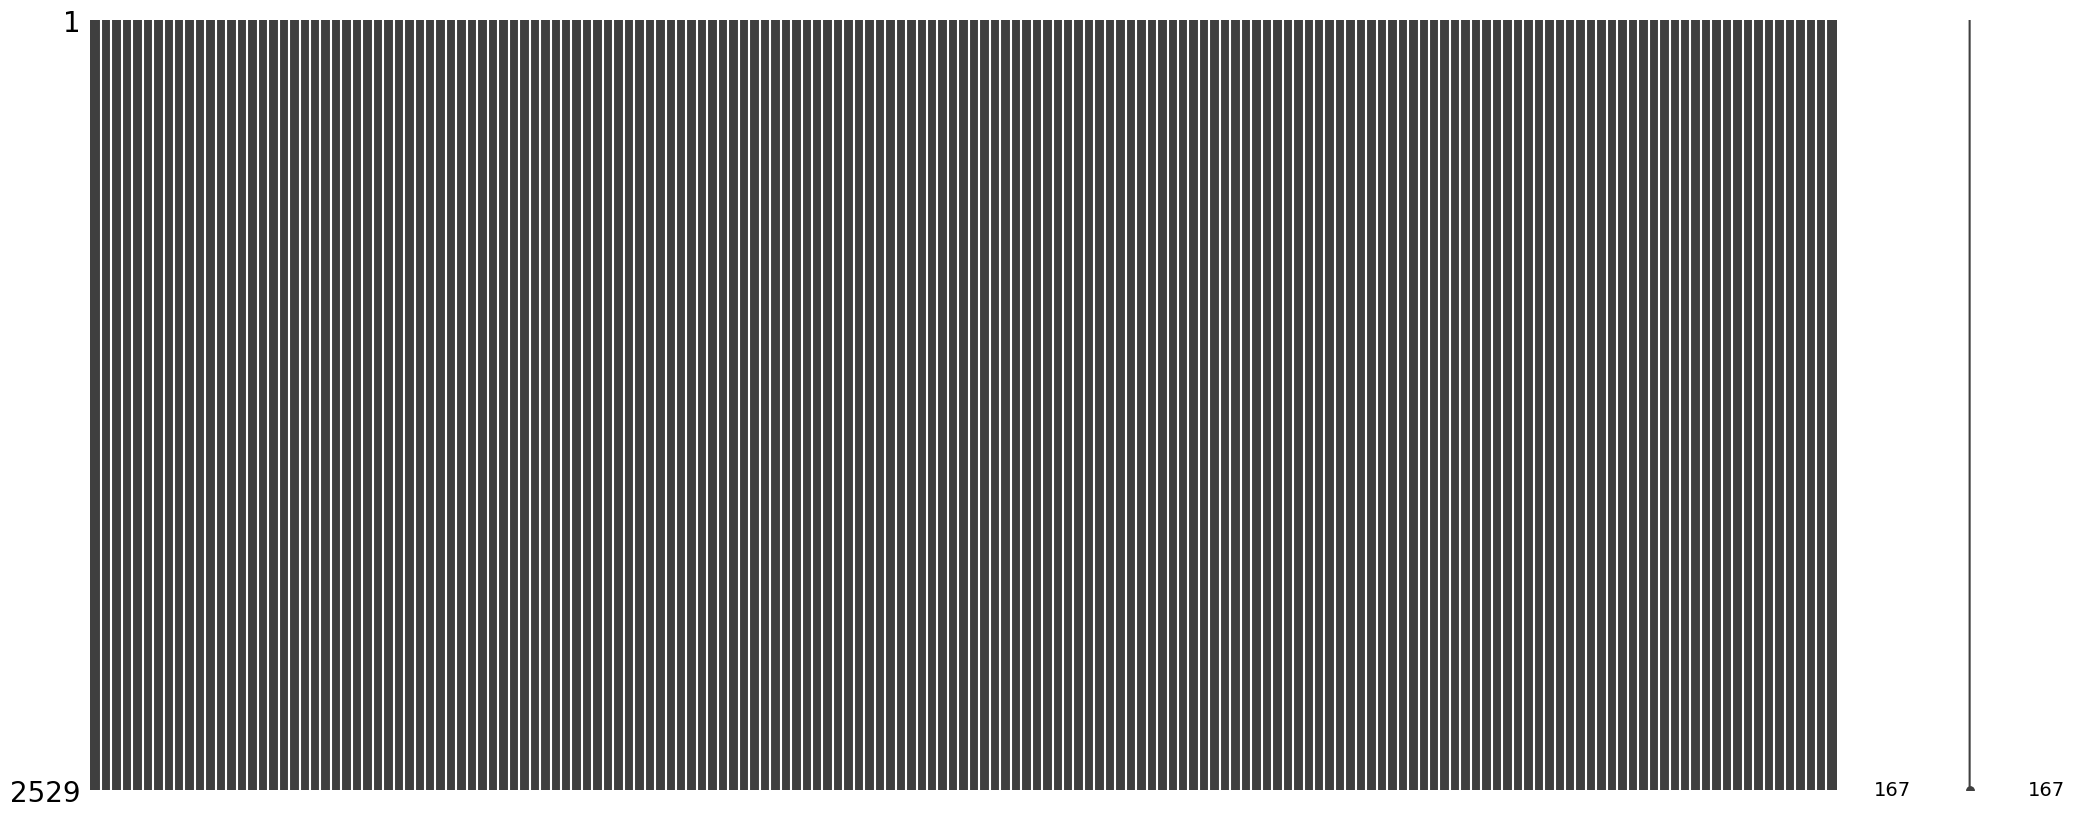

In [16]:
msno.matrix(merged_df)

In [17]:
# correlation matrix
def correlation_hm(df):
    correlation_matrix = df.corr()
    
    variables = correlation_matrix.columns
    important_variables = []
    for row in variables:
        corrl = correlation_matrix.loc[row, 'label']
        important_variables.append(row)

    hp = correlation_matrix.loc[important_variables, important_variables]
    plt.figure("Heatmap-Important Variables", figsize=(24,14))
    sns.heatmap(hp, annot=True, cbar=True)

In [ ]:
correlation_hm(merged_df)

Output hidden; open in https://colab.research.google.com to view.

In [18]:
# Check data balance

def plot_balance(df, title='Title'):
  label_counts = df['label'].value_counts().sort_index()
  x = label_counts.index.tolist()
  y = label_counts.tolist()

  plt.bar(x, y)
  plt.xlim(-2, 2)
  plt.xticks(x)
  plt.title(title)
  plt.xlabel('Label')
  plt.ylabel('Occurrence')
  plt.show()

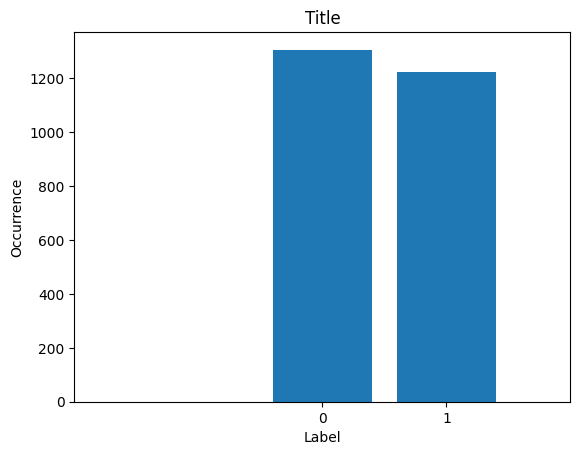

In [ ]:
plot_balance(merged_df)

## Feature importance 

In [19]:
X = merged_df.drop(['id', 'label'], axis=1, inplace=False)
Y = merged_df['label']

In [ ]:
Y

0       1
1       1
2       0
3       0
4       0
       ..
2524    1
2525    0
2526    1
2527    0
2528    0
Name: label, Length: 2529, dtype: int64

In [20]:
def feature_importance(X,Y):
  #Train a random forest regressor on the entire dataset
  rf = RandomForestClassifier(n_estimators=100, random_state=42)
  rf.fit(X, Y)

  # Get the feature importances from the trained random forest
  importances = rf.feature_importances_

  # Rank the features by importance and print the top 10
  sorted_idx = importances.argsort()[::-1]
  for i in range(10):
      print(f"{i+1}. Feature '{X.columns[sorted_idx[i]]}' has importance {importances[sorted_idx[i]]:.3f}")

  # # Select the top k features based on importance
  # k = 5
  # top_k_idx = sorted_idx[:k]
  # X_top_k = X.iloc[:, top_k_idx]

  # Plot the importance
  sorted_importances = importances[sorted_idx]
  sorted_features = X.columns[sorted_idx]

  # Plot the feature importances as a bar plot
  plt.bar(range(X.shape[1]), sorted_importances)
  plt.xticks(range(X.shape[1]), sorted_features, rotation=90)
  plt.title("Feature Importances")
  plt.show()

1. Feature 'C' has importance 0.044
2. Feature 'PAAC5' has importance 0.039
3. Feature '_NormalizedVDWVC1' has importance 0.035
4. Feature 'P' has importance 0.034
5. Feature 'I' has importance 0.031
6. Feature 'PAAC10' has importance 0.029
7. Feature 'APAAC10' has importance 0.028
8. Feature 'APAAC5' has importance 0.027
9. Feature 'PAAC15' has importance 0.026
10. Feature '_HydrophobicityC2' has importance 0.022


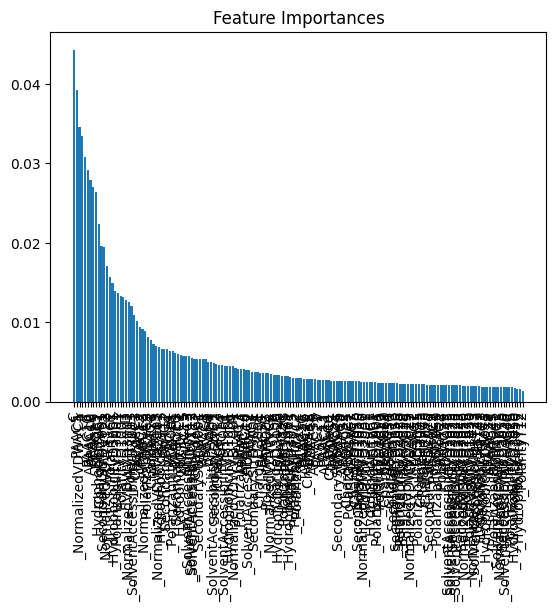

In [ ]:
feature_importance(X,Y)

# **Model Training**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split the training data into train and validation

# Split the data
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2)

In [ ]:
important_cols = X.columns
# Scaling
scaler = StandardScaler()
normal = ColumnTransformer([('normalize', scaler, important_cols)], remainder = 'passthrough')

In [ ]:
X_train = pd.DataFrame(normal.fit_transform(X_train), columns = important_cols)
X_val = pd.DataFrame(normal.transform(X_val), columns = important_cols)

In [ ]:
# save the scaler
# save the normal object to a file for use in inferencing
joblib.dump(normal, f'/content/drive/MyDrive/BI-druggable-protein-prediction/Dumps/normal_{predictor}.joblib')

['/content/drive/MyDrive/BI-druggable-protein-prediction/Dumps/normal_4_features.joblib']

In [26]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.3 MB/s eta 0:00:00


In [27]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from catboost import CatBoostClassifier

models = {
    'SVM': {
        'model': SVC(),
        'best_param': None,
        'best_score': None
        },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'best_param': None,
        'best_score': None
        },
    'Logistic Regression': {
        'model': LogisticRegression(),
        'best_param': None,
        'best_score': None
        },
    'XGBoost': {
        'model': xgb.XGBClassifier(),
        'best_param': None,
        'best_score': None
        },
    'CatBoost': {
        'model': CatBoostClassifier(),
        'best_param': None,
        'best_score': None
        }
}

param_grid = {
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]},
    'Logistic Regression': {'C': [0.1, 1, 10], 'solver': ['liblinear']},
    'XGBoost': {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]},
    'CatBoost': {'iterations': [100, 200, 300], 'depth': [3, 5, 7]}
}


In [ ]:
from sklearn.model_selection import cross_val_score

##cross validation

In [ ]:
cross_V_result={topic:'cross-validate results'}
for model_name, classifier in models.items():
    scores = cross_val_score(classifier['model'], X_train, Y_train, cv=5)  # Adjust the cv value as needed
    cross_V_result['Classifier'] = model_name
    cross_V_result['Cross-validation scores'] = scores
    cross_V_result['Average accuracy'] = scores.mean()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Streaming output truncated to the last 5000 lines.
4:	learn: 0.6440844	total: 235ms	remaining: 46.8s
5:	learn: 0.6360580	total: 317ms	remaining: 52.6s
6:	learn: 0.6262641	total: 400ms	remaining: 56.8s
7:	learn: 0.6174880	total: 486ms	remaining: 1m
8:	learn: 0.6090725	total: 568ms	remaining: 1m 2s
9:	learn: 0.6007393	total: 648ms	remaining: 1m 4s
10:	learn: 0.5934938	total: 727ms	remaining: 1m 5s
11:	learn: 0.5867674	total: 808ms	remaining: 1m 6s
12:	learn: 0.5794679	total: 887ms	remaining: 1m 7s
13:	learn: 0.5724031	total: 971ms	remaining: 1m 8s
14:	learn: 0.5661655	total: 1.05s	remaining: 1m 9s
15:	learn: 0.5593767	total: 1.14s	remaining: 1m 9s
16:	learn: 0.5514336	total: 1.22s	remaining: 1m 10s
17:	learn: 0.5446351	total: 1.29s	remaining: 1m 10s
18:	learn: 0.5377562	total: 1.38s	remaining: 1m 11s
19:	learn: 0.5314103	total: 1.46s	remaining: 1m 11s
20:	learn: 0.5259682	total: 1.53s	remaining: 1m 11s
21:	learn: 0.5201650	total: 1.6s	remaining: 1m 11s
22:	learn: 0.5141584	total: 1.69s	r

In [ ]:
str(cross_V_result)

'cross-validate results\nClassifier: SVM\nCross-validation scores: [0.91111111 0.8962963  0.88641975 0.8960396  0.88861386]\nAverage accuracy: 0.8956961251680722\n\nClassifier: Random Forest\nCross-validation scores: [0.86666667 0.88148148 0.88888889 0.88861386 0.85891089]\nAverage accuracy: 0.8769123579024569\n\nClassifier: Logistic Regression\nCross-validation scores: [0.9037037  0.87160494 0.88395062 0.88118812 0.87128713]\nAverage accuracy: 0.8823469013568023\n\nClassifier: XGBoost\nCross-validation scores: [0.87901235 0.89135802 0.89135802 0.88861386 0.8960396 ]\nAverage accuracy: 0.8892763720816527\n\nClassifier: CatBoost\nCross-validation scores: [0.9037037  0.8962963  0.9037037  0.90346535 0.87623762]\nAverage accuracy: 0.8966813348001466\n'

cross-validate results

Classifier: SVM

* Cross-validation scores: [0.91111111 0.8962963  0.88641975 0.8960396  0.88861386]
* Average accuracy: 0.8956961251680722


Classifier: Random Forest
* Cross-validation scores: [0.86666667 0.88148148 0.88888889 0.88861386 0.85891089]
* Average accuracy: 0.8769123579024569


Classifier: Logistic Regression
* Cross-validation scores: [0.9037037  0.87160494 0.88395062 0.88118812 0.87128713]
* Average accuracy: 0.8823469013568023


Classifier: XGBoost
* Cross-validation scores: [0.87901235 0.89135802 0.89135802 0.88861386 0.8960396 ]
* Average accuracy: 0.8892763720816527


Classifier: CatBoost

* Cross-validation scores: [0.9037037  0.8962963  0.9037037  0.90346535 0.87623762]
* Average accuracy: 0.8966813348001466

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

class BinaryClassifier:
    def __init__(self, models):
        self.models = models
        self.best_model = None

    def train(self, X_train, y_train):
        for model_name, model in self.models.items():
            print(f"Training {model_name}...")
            model['model'].fit(X_train, y_train)
            print(f"{model_name} training completed.")

    def evaluate(self, X_test, y_test):
        for model_name, model in self.models.items():
            print(f"Evaluating {model_name}...")
            y_pred = model['model'].predict(X_test)
            report = classification_report(y_test, y_pred)
            print(f"Classification Report for {model_name}:")
            print(report)

    def grid_search(self, X_train, y_train, param_grid, cv=5):
        for model_name, model in self.models.items():
            print(f"Performing Grid Search for {model_name}...")
            grid_search = GridSearchCV(model['model'], param_grid[model_name], cv=cv, scoring='f1')
            grid_search.fit(X_train, y_train)
            best_params = grid_search.best_params_
            best_score = grid_search.best_score_
            print(f"Best parameters for {model_name}: {best_params}")
            print(f"Best score for {model_name}: {best_score}")
            self.models[model_name]['best_param'] = best_params
            self.models[model_name]['best_score'] = best_score
            self.models[model_name]['model'] = grid_search.best_estimator_
            if self.best_model is None or grid_search.best_score_ > self.best_model['score']:
                self.best_model = {'model_name': model_name, 'model': grid_search.best_estimator_, 'score': grid_search.best_score_, 'params': best_params}

    def get_best_model(self):
        return self.best_model

    # def compare_models(self, X_test, y_test):
    #   metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    #   scores = []

    #   for model_name, model in self.models.items():
    #       y_pred = model.predict(X_test)
    #       accuracy = accuracy_score(y_test, y_pred)
    #       precision = precision_score(y_test, y_pred)
    #       recall = recall_score(y_test, y_pred)
    #       f1 = f1_score(y_test, y_pred)
    #       scores.append([accuracy, precision, recall, f1])

    #   scores = np.array(scores)

    #   # Plot the comparison
    #   fig, ax = plt.subplots(figsize=(10, 6))
    #   ax.bar(metrics, scores.mean(axis=0))
    #   ax.set_xlabel('Metrics')
    #   ax.set_ylabel('Score')
    #   ax.set_title('Model Comparison')
    #   ax.set_ylim(0, 1)

    #   # Add error bars
    #   for i, metric in enumerate(metrics):
    #       score_mean = scores[:, i].mean()
    #       score_std = scores[:, i].std()
    #       ax.errorbar(metric, score_mean, yerr=score_std, fmt='o', color='red')

    #   plt.show()

    def plot_confusion_matrix(self, X_test, y_test):
        for model_name, model in self.models.items():
            y_pred = model['model'].predict(X_test)
            cm = confusion_matrix(y_test, y_pred)
            plt.figure(figsize=(6, 4))
            sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
            plt.title(f'Confusion Matrix - {model_name}')
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.show()

    def compare_models(self, X_test, y_test):
        models = list(self.models.keys())
        metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
        scores = np.zeros((len(models), len(metrics)))

        for i, (model_name, model) in enumerate(self.models.items()):
            y_pred = model['model'].predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            scores[i] = [accuracy, precision, recall, f1]

        sns.set(style='whitegrid')
        plt.figure(figsize=(12, 6))
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
        bar_width = 0.15
        index = np.arange(len(models))

        for i, metric in enumerate(metrics):
            plt.bar(index + i * bar_width, scores[:, i], bar_width, color=colors[i], label=metric)

        plt.xlabel('Models')
        plt.ylabel('Score')
        plt.title('Model Comparison')
        plt.xticks(index + bar_width * (len(metrics) - 1) / 2, models)
        plt.legend()

        # Add data labels
        label_offset = 0.02
        for i, v in enumerate(index):
            for j, metric in enumerate(metrics):
                plt.text(v + j * bar_width, scores[i, j] + label_offset, f'{scores[i, j]:.3f}', ha='center', color='black', fontsize=8)

        plt.tight_layout()
        plt.show()



In [ ]:
classifier = BinaryClassifier(models)

In [ ]:
classifier.train(X_train, Y_train)

Training SVM...
SVM training completed.
Training Random Forest...
Random Forest training completed.
Training Logistic Regression...
Logistic Regression training completed.
Training XGBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


XGBoost training completed.
Training CatBoost...
Learning rate set to 0.013919
0:	learn: 0.6808368	total: 55.3ms	remaining: 55.3s
1:	learn: 0.6688604	total: 95.9ms	remaining: 47.9s
2:	learn: 0.6574221	total: 140ms	remaining: 46.4s
3:	learn: 0.6477891	total: 182ms	remaining: 45.3s
4:	learn: 0.6385455	total: 222ms	remaining: 44.3s
5:	learn: 0.6306889	total: 263ms	remaining: 43.6s
6:	learn: 0.6197554	total: 304ms	remaining: 43.2s
7:	learn: 0.6120165	total: 351ms	remaining: 43.5s
8:	learn: 0.6028098	total: 392ms	remaining: 43.2s
9:	learn: 0.5929733	total: 434ms	remaining: 42.9s
10:	learn: 0.5834378	total: 477ms	remaining: 42.9s
11:	learn: 0.5768054	total: 518ms	remaining: 42.6s
12:	learn: 0.5681924	total: 573ms	remaining: 43.5s
13:	learn: 0.5606140	total: 613ms	remaining: 43.2s
14:	learn: 0.5539965	total: 654ms	remaining: 43s
15:	learn: 0.5463172	total: 695ms	remaining: 42.7s
16:	learn: 0.5394874	total: 735ms	remaining: 42.5s
17:	learn: 0.5324393	total: 778ms	remaining: 42.5s
18:	learn: 0.

In [ ]:
classifier.evaluate(X_val, Y_val)

Evaluating SVM...
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       246
           1       0.94      0.88      0.91       260

    accuracy                           0.91       506
   macro avg       0.91      0.91      0.91       506
weighted avg       0.91      0.91      0.91       506

Evaluating Random Forest...
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       246
           1       0.91      0.86      0.88       260

    accuracy                           0.89       506
   macro avg       0.89      0.89      0.89       506
weighted avg       0.89      0.89      0.89       506

Evaluating Logistic Regression...
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       246
           1       0.93      0.89     

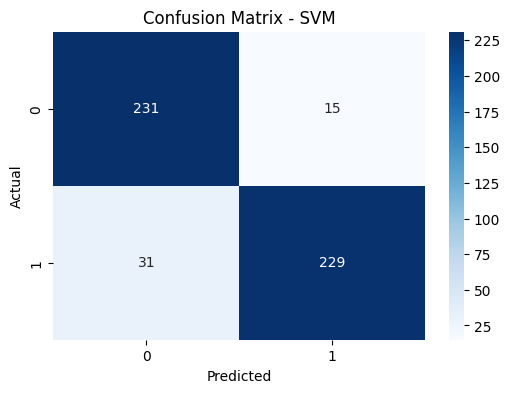

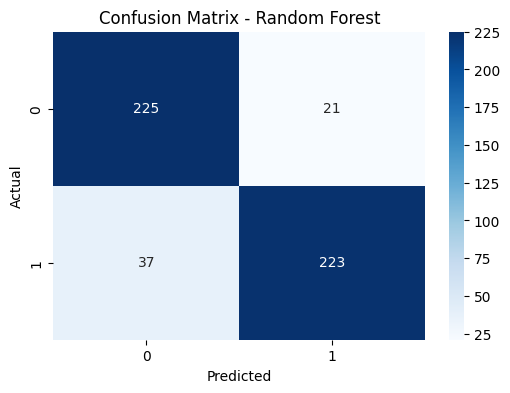

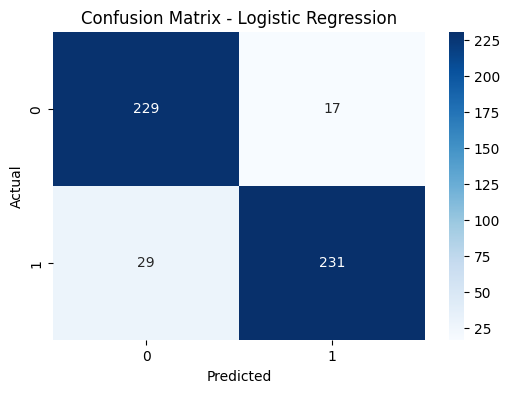

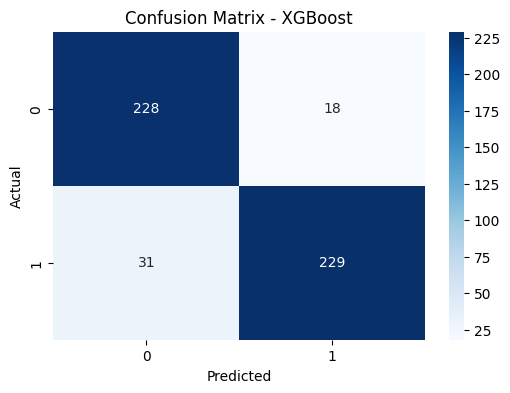

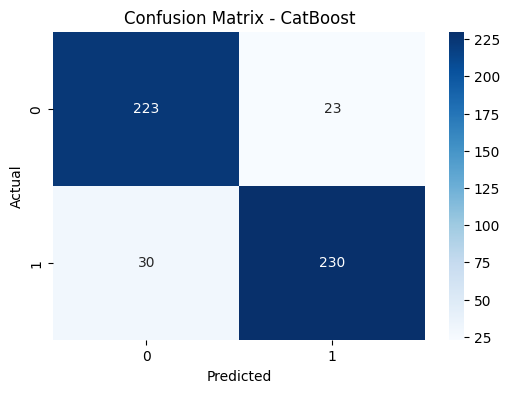

In [ ]:
classifier.plot_confusion_matrix(X_val, Y_val)

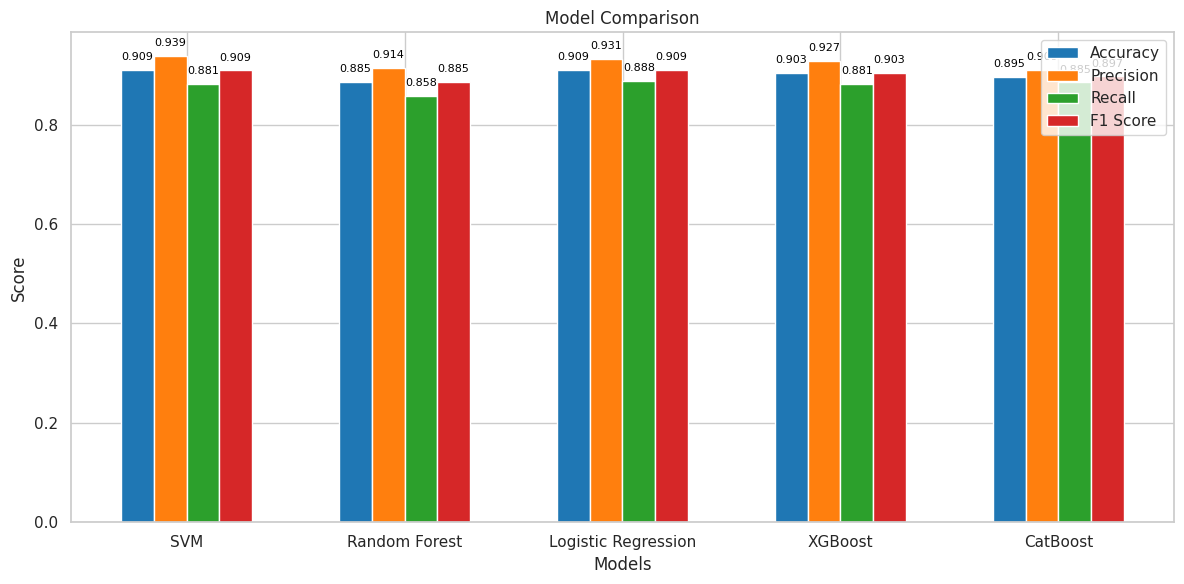

In [ ]:
classifier.compare_models(X_val, Y_val)

In [ ]:
classifier.grid_search(X_train, Y_train, param_grid)

Streaming output truncated to the last 5000 lines.
124:	learn: 0.1463574	total: 3.57s	remaining: 2.14s
125:	learn: 0.1456402	total: 3.59s	remaining: 2.11s
126:	learn: 0.1448291	total: 3.62s	remaining: 2.08s
127:	learn: 0.1441557	total: 3.64s	remaining: 2.05s
128:	learn: 0.1438449	total: 3.66s	remaining: 2.02s
129:	learn: 0.1433858	total: 3.69s	remaining: 1.99s
130:	learn: 0.1426311	total: 3.73s	remaining: 1.96s
131:	learn: 0.1416849	total: 3.75s	remaining: 1.93s
132:	learn: 0.1408414	total: 3.78s	remaining: 1.9s
133:	learn: 0.1399221	total: 3.8s	remaining: 1.87s
134:	learn: 0.1391272	total: 3.83s	remaining: 1.84s
135:	learn: 0.1384724	total: 3.85s	remaining: 1.81s
136:	learn: 0.1373988	total: 3.88s	remaining: 1.78s
137:	learn: 0.1361937	total: 3.9s	remaining: 1.75s
138:	learn: 0.1352291	total: 3.92s	remaining: 1.72s
139:	learn: 0.1342248	total: 3.95s	remaining: 1.69s
140:	learn: 0.1332352	total: 3.98s	remaining: 1.66s
141:	learn: 0.1322443	total: 4s	remaining: 1.63s
142:	learn: 0.13148

In [ ]:
best_model = classifier.get_best_model()
print("Best Model:", best_model['model_name'])

Best Model: CatBoost


In [ ]:
classifier.models

{'SVM': {'model': SVC(C=1),
  'best_param': {'C': 1, 'kernel': 'rbf'},
  'best_score': 0.8887893544480864},
 'Random Forest': {'model': RandomForestClassifier(n_estimators=300),
  'best_param': {'max_depth': None, 'n_estimators': 300},
  'best_score': 0.8734499470489456},
 'Logistic Regression': {'model': LogisticRegression(C=0.1, solver='liblinear'),
  'best_param': {'C': 0.1, 'solver': 'liblinear'},
  'best_score': 0.8845838944446717},
 'XGBoost': {'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max

In [ ]:
models

{'SVM': {'model': SVC(C=1),
  'best_param': {'C': 1, 'kernel': 'rbf'},
  'best_score': 0.8887893544480864},
 'Random Forest': {'model': RandomForestClassifier(n_estimators=300),
  'best_param': {'max_depth': None, 'n_estimators': 300},
  'best_score': 0.8734499470489456},
 'Logistic Regression': {'model': LogisticRegression(C=0.1, solver='liblinear'),
  'best_param': {'C': 0.1, 'solver': 'liblinear'},
  'best_score': 0.8845838944446717},
 'XGBoost': {'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max

## Model  Saving

In [ ]:
# save the best model

from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', normal), ('model', best_model['model'])])

pipe.fit(X_train, Y_train)


Learning rate set to 0.060891
0:	learn: 0.6564616	total: 22.9ms	remaining: 4.55s
1:	learn: 0.6301108	total: 38.7ms	remaining: 3.83s
2:	learn: 0.6034829	total: 54ms	remaining: 3.55s
3:	learn: 0.5795144	total: 76.6ms	remaining: 3.75s
4:	learn: 0.5571441	total: 100ms	remaining: 3.91s
5:	learn: 0.5368359	total: 125ms	remaining: 4.03s
6:	learn: 0.5203451	total: 146ms	remaining: 4.02s
7:	learn: 0.5064686	total: 167ms	remaining: 4.01s
8:	learn: 0.4914931	total: 191ms	remaining: 4.05s
9:	learn: 0.4783050	total: 222ms	remaining: 4.22s
10:	learn: 0.4646429	total: 244ms	remaining: 4.19s
11:	learn: 0.4576198	total: 267ms	remaining: 4.19s
12:	learn: 0.4479000	total: 292ms	remaining: 4.2s
13:	learn: 0.4386913	total: 314ms	remaining: 4.17s
14:	learn: 0.4291235	total: 335ms	remaining: 4.13s
15:	learn: 0.4202712	total: 358ms	remaining: 4.12s
16:	learn: 0.4136884	total: 382ms	remaining: 4.11s
17:	learn: 0.4055708	total: 403ms	remaining: 4.08s
18:	learn: 0.3987458	total: 437ms	remaining: 4.17s
19:	learn:

['/content/drive/MyDrive/BI-druggable-protein-prediction/Models/features_combined_predictor.joblib']

In [ ]:
# joblib.dump(pipe, f"/content/drive/MyDrive/BI-druggable-protein-prediction/Models/{predictor}.joblib")

['/content/drive/MyDrive/BI-druggable-protein-prediction/Models/4_features.joblib']

In [104]:
# import the trained model

predictor_model = joblib.load(f"/content/drive/MyDrive/BI-druggable-protein-prediction/Models/{predictor}.joblib")

#import the scaler

normal_4_features = joblib.load(f'/content/drive/MyDrive/BI-druggable-protein-prediction/Dumps/normal_{predictor}.joblib')

normal_AAC = joblib.load(f'/content/drive/MyDrive/BI-druggable-protein-prediction/Dumps/normal_AAC.joblib')
normal_PAAC = joblib.load(f'/content/drive/MyDrive/BI-druggable-protein-prediction/Dumps/normal_PAAC.joblib')
normal_APAAC = joblib.load(f'/content/drive/MyDrive/BI-druggable-protein-prediction/Dumps/normal_APAAC.joblib')
normal_CTD = joblib.load(f'/content/drive/MyDrive/BI-druggable-protein-prediction/Dumps/normal_CTD.joblib')

In [34]:
feature_set_test=[AAC_test,PAAC_test,APAAC_test,CTD_test]

In [55]:
# features_AAC_test = AAC_test.drop(['id', 'label'], axis=1, inplace = False)
# features_PAAC_test = PAAC_test.drop(['id', 'label'], axis=1, inplace = False)
# features_APAAC_test = APAAC_test.drop(['id', 'label'], axis=1, inplace = False)
# features_CTD_test = CTD_test.drop(['id', 'label'], axis=1, inplace = False)

In [97]:
AAC_train = pd.read_csv(f'{dir}/selected_data/preprocessed_AAC.csv')
PAAC_train = pd.read_csv(f'{dir}/selected_data/preprocessed_PAAC.csv')
APAAC_train = pd.read_csv(f'{dir}/selected_data/preprocessed_APAAC.csv')
CTD_train = pd.read_csv(f'{dir}/selected_data/preprocessed_CTD.csv')
features_4_train = pd.read_csv(f'{dir}/selected_data/preprocessed_4_features.csv')

In [99]:
AAC_columns=AAC_train.columns
PAAC_columns=PAAC_train.columns
APAAC_columns=APAAC_train.columns
CTD_columns=CTD_train.columns
features_4_columns=features_4_train.columns

In [40]:
print(AAC_columns.shape)
print(PAAC_columns.shape)
print(APAAC_columns.shape)
print(CTD_columns.shape)

(16,)
(23,)
(30,)
(104,)


In [100]:
important_cols_AAC = AAC_columns.drop(['id','label'])
important_cols_PAAC = PAAC_columns.drop(['id','label'])
important_cols_APAAC = APAAC_columns.drop(['id','label'])
important_cols_CTD = CTD_columns.drop(['id','label'])
important_cols_features_4 = features_4_columns.drop(['id','label'])

In [102]:
print(important_cols_AAC.shape)
print(important_cols_PAAC.shape)
print(important_cols_APAAC.shape)
print(important_cols_CTD.shape)
print(important_cols_features_4.shape)

(14,)
(21,)
(28,)
(102,)
(165,)


In [81]:
print(APAAC_test.shape)

(461, 30)


In [75]:
AAC_test = AAC_test[AAC_columns]
PAAC_test = PAAC_test[PAAC_columns]
APAAC_test = APAAC_test[APAAC_columns]
CTD_test = CTD_test[CTD_columns]

In [67]:
a=features_AAC_test.columns.tolist()
a.sort()
a

['A',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'V',
 'W',
 'Y']

In [69]:
b=important_cols_AAC.tolist()
b.sort()
b

['C', 'D', 'E', 'F', 'I', 'K', 'L', 'N', 'P', 'Q', 'R', 'S', 'V', 'Y']

In [77]:
# scaled_features_AAC = pd.DataFrame(normal_AAC.transform(AAC_test), columns = important_cols_AAC)
# scaled_features_PAAC = pd.DataFrame(normal_PAAC.transform(PAAC_test), columns = important_cols_PAAC.tolist())
# scaled_features_APAAC = pd.DataFrame(normal_APAAC.transform(APAAC_test), columns = important_cols_APAAC.tolist())
# scaled_features_CTD = pd.DataFrame(normal_CTD.transform(CTD_test), columns = important_cols_CTD.tolist())

In [84]:
merged_df_test = feature_set_test[0]
feature_set_test=[AAC_test,PAAC_test,APACC_test,CTD_test]
for feature in feature_set_test[1:]:
  merged_df_test = pd.merge(merged_df_test, feature, on=('id','label'))

In [89]:
scaled_features_AAC_test = pd.DataFrame(normal_AAC.transform(merged_df_test), columns = important_cols_AAC)
scaled_features_PAAC_test = pd.DataFrame(normal_PAAC.transform(merged_df_test), columns = important_cols_PAAC.tolist())
scaled_features_APAAC_test = pd.DataFrame(normal_APAAC.transform(merged_df_test), columns = important_cols_APAAC.tolist())
scaled_features_CTD_test = pd.DataFrame(normal_CTD.transform(merged_df_test), columns = important_cols_CTD.tolist())

In [93]:
scaled_features_merged = pd.concat([merged_df_test['label'], scaled_features_AAC_test], axis=1)
scaled_features_merged = pd.concat([merged_df_test['id'], scaled_features_merged], axis=1)
scaled_features_merged = pd.concat([scaled_features_PAAC_test, scaled_features_merged], axis=1)
scaled_features_merged = pd.concat([scaled_features_APAAC_test, scaled_features_merged], axis=1)
scaled_features_merged = pd.concat([scaled_features_CTD_test, scaled_features_merged], axis=1)

In [94]:
scaled_features_merged.shape

(461, 167)

In [105]:
scaled_4_features = pd.DataFrame(normal_4_features.transform(scaled_features_merged), columns = important_cols_features_4)

In [106]:
predict_results = predictor_model.predict(scaled_4_features)

In [107]:
report = classification_report(merged_df_test.label, predict_results)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       237
           1       0.91      0.84      0.87       224

    accuracy                           0.88       461
   macro avg       0.88      0.88      0.88       461
weighted avg       0.88      0.88      0.88       461



In [116]:
def report(y_true, y_pred):
  # Calculate accuracy
  accuracy = accuracy_score(y_true, y_pred)

  # Calculate F1 score
  f1 = f1_score(y_true, y_pred)

  # Calculate sensitivity (recall)
  sensitivity = recall_score(y_true, y_pred)

  # Calculate specificity
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  specificity = tn / (tn + fp)

  # Calculate precision
  precision = precision_score(y_true, y_pred)

  weights = {'Accuracy': 0.3, 'F1': 0.2, 'Sensitivity': 0.2, 'Specificity': 0.1, 'Precision': 0.2}

  data = {'Accuracy': [accuracy],
        'F1': [f1],
        'Sensitivity': [sensitivity],
        'Specificity': [specificity],
        'Precision': [precision]}
  df = pd.DataFrame(data)

   # Calculate the combined score
  combined_score = sum([weights[metric] * df[metric].values[0] for metric in weights])
  df['Combined Score'] = combined_score

  print(df)
  # df.to_csv(f'/content/drive/MyDrive/BI-druggable-protein-prediction/Predictions/{predictor}_classification_metrics.csv', index=False)


In [115]:
predictor

'4_features'

In [119]:
report(merged_df_test.label, predict_results)

   Accuracy       F1  Sensitivity  Specificity  Precision  Combined Score
0  0.880694  0.87239     0.839286     0.919831   0.908213        0.880169


In [108]:
results = pd.DataFrame({'predicted_values': predict_results})

In [109]:
results = pd.concat([merged_df_test['id'], results], axis=1)

In [110]:
results

,id,predicted_values
0,Negative_210,0
1,Positive_79,0
2,Positive_202,1
3,Positive_115,1
4,Positive_0,1
...,...,...
456,Positive_220,1
457,Positive_57,1
458,Positive_179,1
459,Positive_4,1


In [111]:
results.to_csv(f'/content/drive/MyDrive/BI-druggable-protein-prediction/Predictions/{predictor}_predictions.csv', index=False)

##Output txt

In [117]:
results['Numeric'] = results['id'].str.split('_').str[1].astype(int)

predictions_neg = results[results['id'].str.startswith('N')]
# Sort the DataFrame based on the 'Numeric' column in ascending order
predictions_neg = predictions_neg.sort_values('Numeric')

# Remove the 'Numeric' column from the sorted DataFrame
predictions_neg = predictions_neg.drop('Numeric', axis=1)

predictions_pos = results[results['id'].str.startswith('P')]
# Sort the DataFrame based on the 'Numeric' column in ascending order
predictions_pos = predictions_pos.sort_values('Numeric')

# Remove the 'Numeric' column from the sorted DataFrame
predictions_pos = predictions_pos.drop('Numeric', axis=1)

In [118]:
# Save the DataFrame to a text file
# predictions_pos.to_csv(f'/content/drive/MyDrive/BI-druggable-protein-prediction/Predictions/{predictor}_predictions_pos.txt', index=False, header=True, sep='\t')
# predictions_neg.to_csv(f'/content/drive/MyDrive/BI-druggable-protein-prediction/Predictions/{predictor}_predictions_neg.txt', index=False, header=True, sep='\t')